 Etudier les options de préprocessing, nettoyage du background, segmentation par KMeans ou MeanShift.

Commencer les premiers modèles de classification : SVM et RandomForest à investiguer en priorité.

In [ ]:
#Import des bibliothèques
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Pour répartir les données
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.ensemble import RandomForestClassifier # Pour instancier et entraîner un modèle Random Forest
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [ ]:
path='/Users/emilienbonhomme/Desktop/DataScientest - Projet Blood Cell/'
df_infos = pd.read_csv(path + 'img_info.csv')

# 1. Preprocessing

In [ ]:
img_random = [] # On crée une liste pour stocker l'image récupéré pour chaque type
for t in df_infos['type'].value_counts().index: # pour chaque type de cellule 
    list_index = df_infos[df_infos['type'] == t].index   # On récupere l'index des entrées du type de cellule
    img = np.random.choice(list_index) # on choisit au hasard l'un des index
    img_random.append(img) # et on l'ajoute à la liste image_random

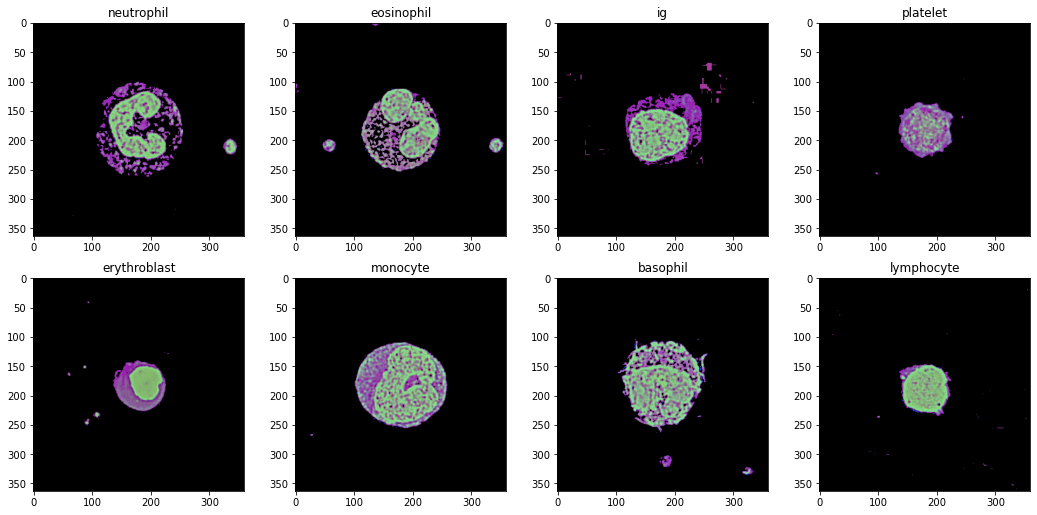

In [ ]:
# Filtrage du background par couleur
figure = plt.figure(figsize=(18,18)) 
index_tmp = 1
filtered_image = []
for i in img_random:
    filename = df_infos.loc[i,'address_file']
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_color = np.array([30, 0, 0])
    upper_color = np.array([165,255,255])
    mask_color = cv2.inRange(img, lower_color, upper_color)
    res_red = cv2.bitwise_and(img,img, mask= mask_color)
    plt.subplot(4,4,index_tmp)
    plt.imshow(res_red);
    plt.title(df_infos.loc[i,'type'])
    filtered_image.append(res_red)
    index_tmp+=1
    
    

# 2. Segmentation

## 2.1. KMeans (Pour avoir un rendu plus propre, appliquer en amont une segmentation par couleur pour enlever le fond)

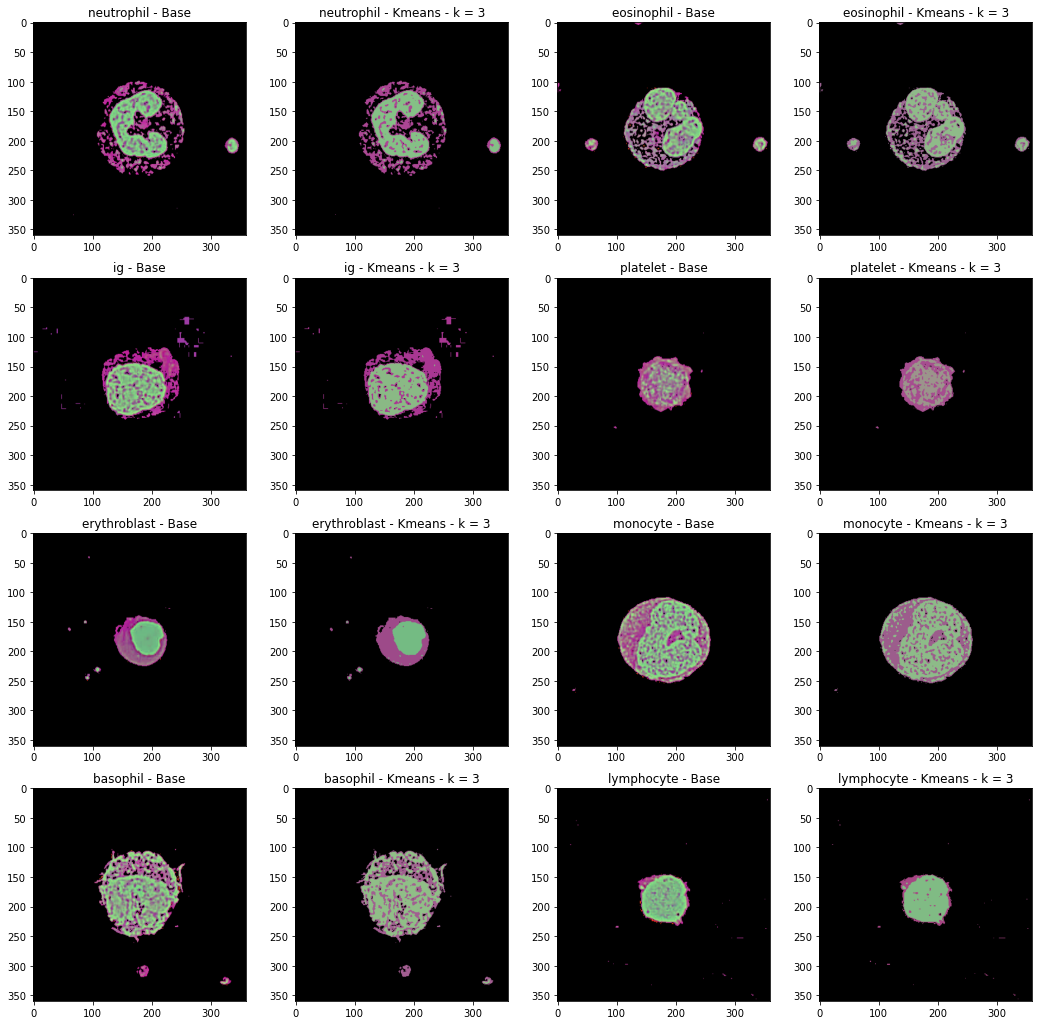

In [ ]:
# Segmentation Kmeans a partir d'image en HSV
figure = plt.figure(figsize=(18,18)) 
index_tmp = 1
index_filtered_img = 0
k = 3
clustered_img = []
# pour chaque image de la liste
for i in img_random: 
    #On recupere l'image (par son index) de la liste crée par filtrage par couleur et on l'affiche
    img = cv2.resize(filtered_image[index_filtered_img],(360,360))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4,4,index_tmp)
    plt.title(df_infos.loc[i,'type'] + ' - Base')
    plt.imshow(img);
    index_tmp+=1
    
    #Kmeans
    pixel_vals = img.reshape((-1,3)) 
    pixel_vals = np.float32(pixel_vals)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
    centers = np.uint8(centers) 
    segmented_data = centers[labels.flatten()] 
    segmented_image = segmented_data.reshape((img.shape)) 
    
    plt.subplot(4,4,index_tmp)
    plt.title(df_infos.loc[i,'type'] + ' - Kmeans - k = ' + str(k))
    plt.imshow(segmented_image);
    clustered_img.append(segmented_image)
    index_filtered_img +=1
    index_tmp+=1


In [ ]:
len(clustered_img)

8

## 2.2 Canny

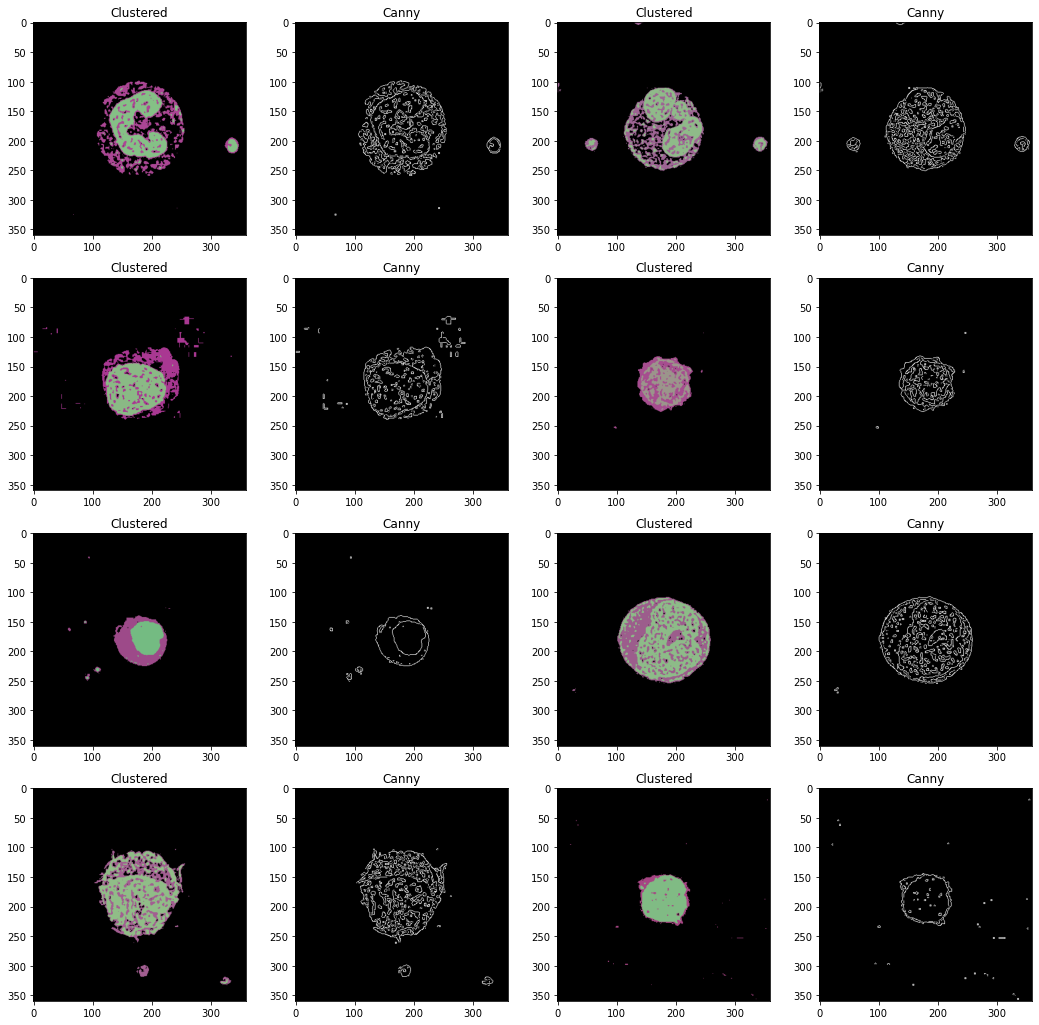

In [ ]:
figure = plt.figure(figsize=(18,18)) 
index_tmp = 1
for i in clustered_img:     # pour chaque index dans la liste
    img = i
    plt.subplot(4,4,index_tmp)
    plt.title('Clustered')
    plt.imshow(img);
    index_tmp+=1
    plt.subplot(4,4,index_tmp)
    edges = cv2.Canny(img,150,200)
    plt.title('Canny')
    plt.imshow(edges, 'gray')
    index_tmp+=1

## 2.3. Mean Shift

/Users/emilienbonhomme/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=21.317975368504996 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Centroids:  11


/Users/emilienbonhomme/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=21.68536476908299 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Centroids:  11


/Users/emilienbonhomme/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=21.854572394486095 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Centroids:  7


/Users/emilienbonhomme/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=14.372055216332164 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Centroids:  14


/Users/emilienbonhomme/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=10.329254145229228 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Centroids:  34


/Users/emilienbonhomme/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=33.566483762325 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Centroids:  4


/Users/emilienbonhomme/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=31.096985453978036 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Centroids:  6


/Users/emilienbonhomme/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=10.596782999164283 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Centroids:  61


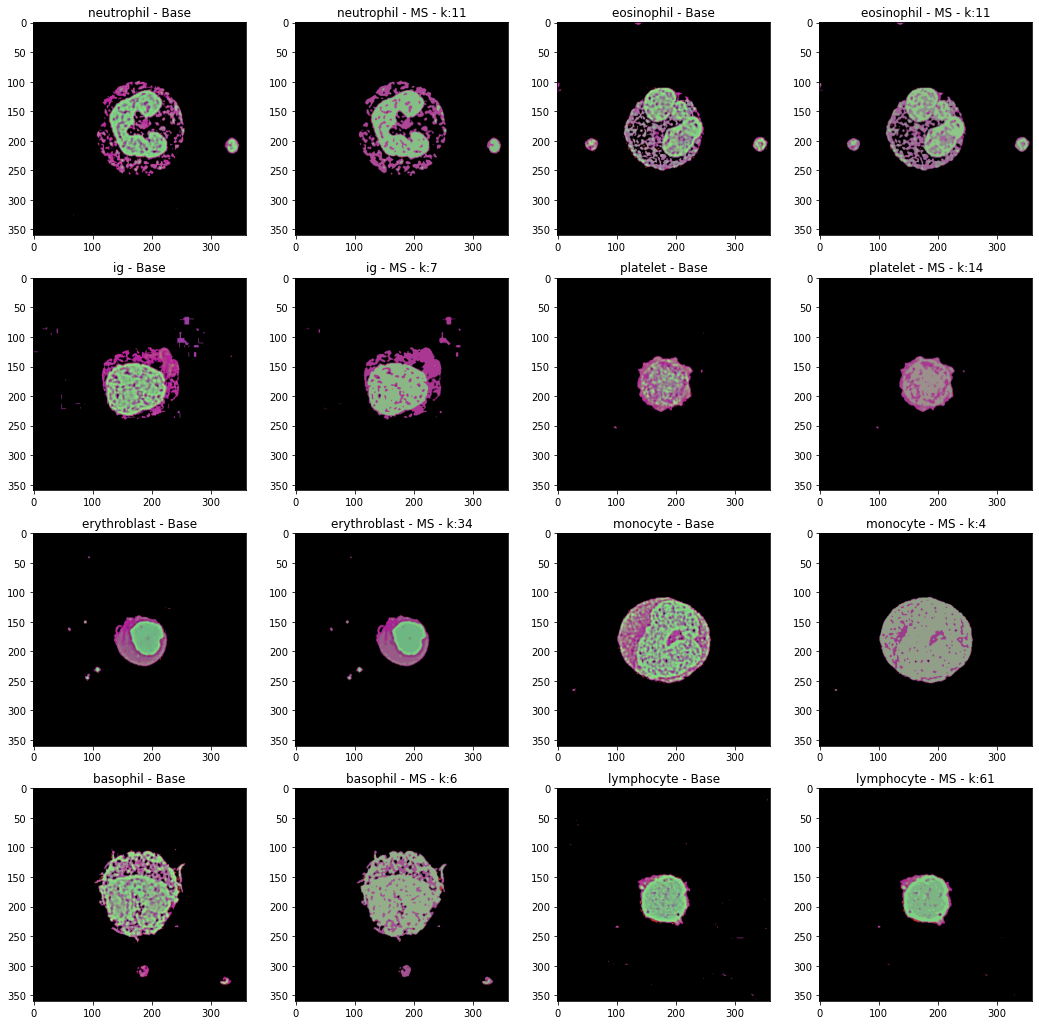

In [ ]:
figure = plt.figure(figsize=(18,18)) 
index_tmp = 1
index_filtered_img= 0
for i in img_random:     # pour chaque index dans la liste
    img = cv2.resize(filtered_image[index_filtered_img],(360,360))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4,4,index_tmp)
    plt.title(df_infos.loc[i,'type'] +' - Base')
    plt.imshow(img, 'gray');
    index_filtered_img +=1

    index_tmp+=1
    
    # filtre de réduction du bruit
    img = cv2.medianBlur(img, 3)

    # aplatir l'image
    flat_image = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

    # meanshift
    bandwidth = estimate_bandwidth(flat_image, quantile=0.5, n_samples=100)
    ms = MeanShift(bandwidth, max_iter=2000, bin_seeding=True)
    ms.fit(flat_image)
    labels=ms.labels_
    centroids = ms.cluster_centers_

    # obtenir le nombre de centroids
    print('Centroids: ', centroids.shape[0])

    # Obtenir la couleur moyenne de chaque centroid
    total = np.zeros((centroids.shape[0], 3), dtype=float)
    count = np.zeros(total.shape, dtype=float)

    # Pour chaque label dans le tableau des labels
    for j, label in enumerate(labels):
        #On ajoute les valeurs RGB de chaque pixel de l'image applatit
        total[label] = total[label] + flat_image[j]
        count[label] += 1

    # On calcule la moyenne du RGB
    avg = total/count
    # On arrondi à l'entier
    avg = np.uint8(avg)

    # transposition de l'image étiquetée dans la couleur moyenne correspondante
    result = avg[labels]
    result = result.reshape((img.shape))

    #Affichage du resultat
    plt.subplot(4,4,index_tmp)
    plt.title(df_infos.loc[i,'type'] + ' - MS - k:' + str(centroids.shape[0]))
    plt.imshow(result, 'gray');
    index_tmp+=1

# 2. Classification

## 2.1. SVM

In [ ]:
# IL FAUT TOTALEMENT APPLATIR L'IMAGE 

data = []
for i in df_infos['address_file']: # pour chaque adresse d'image 
    img_data = cv2.imread(i,cv2.COLOR_BGR2HSV)
    flat_image = img_data.reshape(img_data.shape[0]*img_data.shape[1], img_data.shape[2])
    data.append(flat_image)
data = np.array(data)

# On renomme les différents types de cellules en numérique
df_infos['id_type'] = df_infos['type'].replace({"neutrophil": "1",
                                    "eosinophil": "2",
                                    "ig": "3",
                                    "platelet": "4",
                                    "erythroblast": "5",
                                    "monocyte": "6",
                                    "basophil": "7",
                                    "lymphocyte": "8"})
#Pour chaque dossier, on recupere une image et on la stocke 
target = df_infos["id_type"]

<ipython-input-13-2b2febb3a09d>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [ ]:
data[0].shape


(8190, 3)

In [ ]:
X_train,y_train, X_test,y_test = train_test_split(data,target, test_size=0.2, random_state=123)


In [ ]:
svm = SVC()
svm.fit(X_train,y_train);

NameError: name 'X_train' is not defined

In [ ]:
#pour la classification on utilise les images de bases sans filtre

# et l'etape 2 serait d'appliquer la segmentation par KMEANS et effectuer la classification 
#en reprenant les labels de target

## 2.2 Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train);